In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
fighters = pd.read_csv("data/fighter-database-clean.csv")
fights = pd.read_csv("data/fight-database.csv")
elo = pd.read_csv("data/elo-clean.csv")

In [69]:
fighters.head(5)

,id,name,height,weight,reach,ss_min,str_acc,str_a_min,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,wl_diff,momentum,elo,best_elo,avg_opp_elo
0,15df64c02b6b0fde,Danny Abbadi,71,155,75.0,3.29,38,4.41,57,0.00,0,77,0.0,0,2,-2,-2,986.39,1065.42,1127.24
1,b361180739bed4b0,David Abbott,72,265,75.0,1.35,30,3.55,38,1.07,33,66,0.0,8,13,-5,-7,953.32,1155.81,1131.39
2,2f5cbecbbe18bac4,Shamil Abdurakhimov,75,235,76.0,2.44,45,2.24,60,1.50,26,66,0.2,4,2,2,2,1500.20,1500.20,1209.79
3,c0ed7b208197e8de,Hiroyuki Abe,66,145,75.0,1.71,36,3.11,63,0.00,0,33,0.0,0,1,-1,0,1216.15,1236.53,1093.63
4,5140122c3eecd307,Daichi Abe,71,170,71.0,3.80,33,4.49,56,0.33,50,0,0.0,1,2,-1,-2,1230.65,1312.60,1186.18


In [70]:
fights.head(5)

,event_id,event_name,f1_id,f1_name,f2_id,f2_name,winner_id,method
0,aa3153a9941b4d44,UFC Fight Night: Magny vs. Ponzinibbio,6d1bffff14897645,Santiago Ponzinibbio,84b3e7d38f2d2ec5,Neil Magny,6d1bffff14897645,KO/TKO
1,aa3153a9941b4d44,UFC Fight Night: Magny vs. Ponzinibbio,3974fa35c917af1d,Ricardo Lamas,92a9aa9c93192871,Darren Elkins,3974fa35c917af1d,KO/TKO
2,aa3153a9941b4d44,UFC Fight Night: Magny vs. Ponzinibbio,c21f26bbde777573,Johnny Walker,749f572d1d3161fb,Khalil Rountree Jr.,c21f26bbde777573,KO/TKO
3,aa3153a9941b4d44,UFC Fight Night: Magny vs. Ponzinibbio,2e585c701f72fe55,Ian Heinisch,dbc17725b887860a,Cezar Ferreira,2e585c701f72fe55,U-DEC
4,aa3153a9941b4d44,UFC Fight Night: Magny vs. Ponzinibbio,7c7332319c14094c,Marlon Vera,d05412b513b19621,Guido Cannetti,7c7332319c14094c,SUB


In [71]:
elo.head(5)

,name,ELO_x,prevdate,Best_Rating_to_Date,Avg_Elo_of_opponets,frFX,id
0,Georges St-Pierre,1991.87,11/4/2017 2:38,1991.87,1484.15,28,6506c1d34da9c013
1,Daniel Cormier,1957.22,11/3/2018 0:00,1957.22,1515.48,24,d967f0128c323de6
2,Jon Jones,1919.88,7/29/2017 2:52,1926.56,1438.10,24,07f72a2a7591b409
3,Gegard Mousasi,1880.79,9/29/2018 0:00,1880.79,1326.82,54,232c582f29f8f65e
4,Tyron Woodley,1878.25,9/8/2018 0:00,1878.25,1426.07,25,effd9de9937996f8


In [78]:
fighters.describe()

,height,weight,reach,ss_min,str_acc,str_a_min,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,wl_diff,momentum,elo,best_elo,avg_opp_elo
count,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000
mean,70.345656,171.199168,73.081947,2.773970,42.261091,3.364353,52.924677,1.503729,33.487523,47.906192,0.779898,2.818392,2.672366,0.146026,-0.963494,1290.135111,1386.249307,1172.602851
std,3.404156,37.151395,3.615634,1.766059,11.752917,2.080857,11.657200,1.791186,29.002771,31.925624,1.441216,4.263275,2.513276,3.114835,1.733267,175.637041,161.609580,85.370182
min,60.000000,115.000000,60.000000,0.060000,4.000000,0.130000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-7.000000,798.790000,949.000000,959.910000
25%,68.000000,145.000000,71.000000,1.637500,35.000000,2.140000,46.000000,0.000000,0.000000,25.000000,0.000000,0.000000,1.000000,-2.000000,-2.000000,1177.172500,1280.907500,1116.187500
50%,70.000000,170.000000,75.000000,2.570000,42.000000,2.980000,54.000000,1.020000,33.000000,50.000000,0.300000,1.000000,2.000000,-1.000000,-1.000000,1281.985000,1383.025000,1163.270000
75%,73.000000,185.000000,75.000000,3.540000,49.000000,4.010000,61.000000,2.300000,50.000000,71.000000,1.000000,4.000000,4.000000,1.000000,0.000000,1392.652500,1482.047500,1218.760000
max,89.000000,400.000000,84.000000,24.470000,87.000000,30.000000,94.000000,24.110000,100.000000,100.000000,20.900000,31.000000,16.000000,24.000000,13.000000,1991.870000,1991.870000,1529.360000


In [79]:
fighters['wl_diff_normal'] = np.log(fighters['wl_diff'] + 10)

In [81]:
fighters.describe()

,height,weight,reach,ss_min,str_acc,str_a_min,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,wl_diff,momentum,elo,best_elo,avg_opp_elo,wl_diff_normal
count,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000
mean,70.345656,171.199168,73.081947,2.773970,42.261091,3.364353,52.924677,1.503729,33.487523,47.906192,0.779898,2.818392,2.672366,0.146026,-0.963494,1290.135111,1386.249307,1172.602851,2.279608
std,3.404156,37.151395,3.615634,1.766059,11.752917,2.080857,11.657200,1.791186,29.002771,31.925624,1.441216,4.263275,2.513276,3.114835,1.733267,175.637041,161.609580,85.370182,0.265386
min,60.000000,115.000000,60.000000,0.060000,4.000000,0.130000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-7.000000,798.790000,949.000000,959.910000,0.000000
25%,68.000000,145.000000,71.000000,1.637500,35.000000,2.140000,46.000000,0.000000,0.000000,25.000000,0.000000,0.000000,1.000000,-2.000000,-2.000000,1177.172500,1280.907500,1116.187500,2.079442
50%,70.000000,170.000000,75.000000,2.570000,42.000000,2.980000,54.000000,1.020000,33.000000,50.000000,0.300000,1.000000,2.000000,-1.000000,-1.000000,1281.985000,1383.025000,1163.270000,2.197225
75%,73.000000,185.000000,75.000000,3.540000,49.000000,4.010000,61.000000,2.300000,50.000000,71.000000,1.000000,4.000000,4.000000,1.000000,0.000000,1392.652500,1482.047500,1218.760000,2.397895
max,89.000000,400.000000,84.000000,24.470000,87.000000,30.000000,94.000000,24.110000,100.000000,100.000000,20.900000,31.000000,16.000000,24.000000,13.000000,1991.870000,1991.870000,1529.360000,3.526361


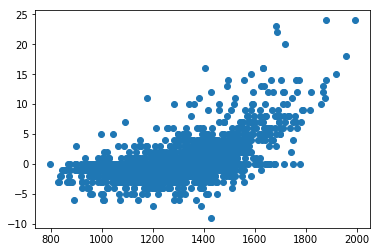

In [77]:
plt.scatter(fighters['elo'], fighters['wl_diff'])

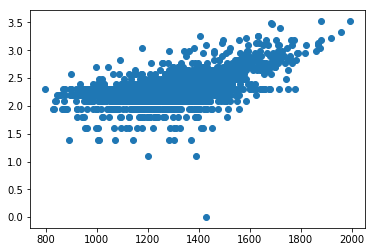

In [83]:
plt.scatter(fighters['elo'], fighters['wl_diff_normal'])

In [97]:
def remove_outlier(x):
    if x <= 1:
        x = fighters['wl_diff_normal'].mean()
    return x

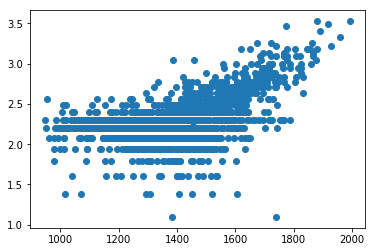

In [100]:
plt.scatter(fighters['best_elo'], [remove_outlier(x) for x in fighters['wl_diff_normal']])